# Suffix Trees

$\textbf{Exact Pattern Matching:}$ Dado un patr'on P y un texto T, buscamos todas las posiciones en el texto en las que el patron aparece como un substring. <br> 

$\textbf{Aproximate Pattern Matching:}$ Dado un patr'on P y un texto T y un entero d, dar como resultado todas las posiciones del texto T en las que aparece P con a lo sum d errores.  


##### Brute Force:
Vamos moviendo el patron paso a paso sobre el texto y en cada paso vemos si el substring del text es igual al patron. <br>
Tiene un tiempo de O(|T||P|), que es bien lento. Y si estamos buscando varios patrones a la vez, empeora mucho, pues hay que sumar estos tiempos para cada patr'on. <br><br>



###### Herding Patterns into Trie

Si queremos buscar muchos patrones a la vez en un texto, podemos crear un Trie como el que sigue:
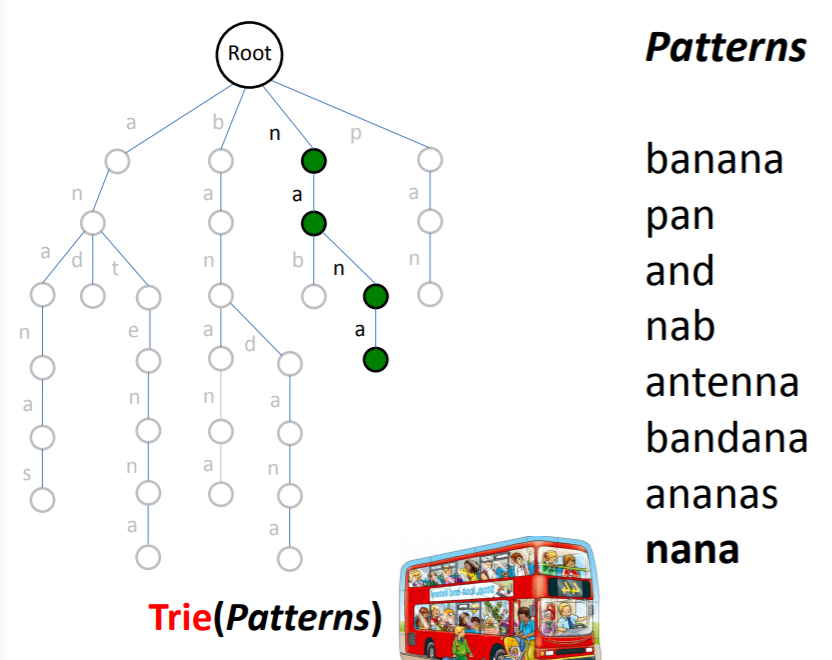

Entonces, el algoritmo de TrieMatching es como sigue: 
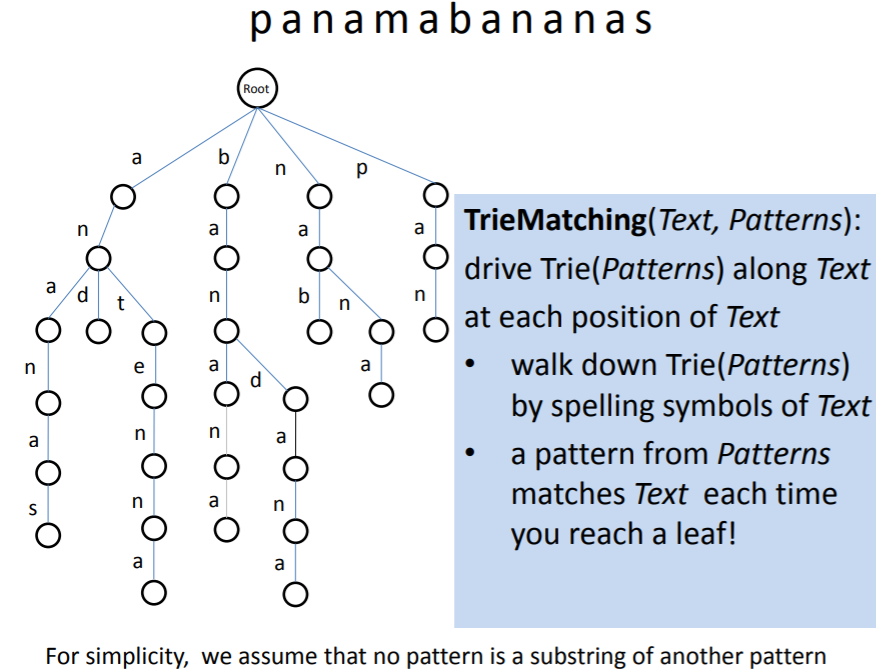

Runtime: O(|T| * |Patron mas largo|)


##### Herding Text into a Suffix Trie 

Lo que hacemos es generar todos los sufijos del Texto T (es decir, todos los substrings de la forma T[i:].  
Por ejemplo, aqu'i tenemos un suffix trie de la palabra panamabanas (le agragamos un simbolo de peso por una raz'on que se ver'a despu'es).  Nota que anotamos al final de cada rama el indice en el que empieza el sufijo. 
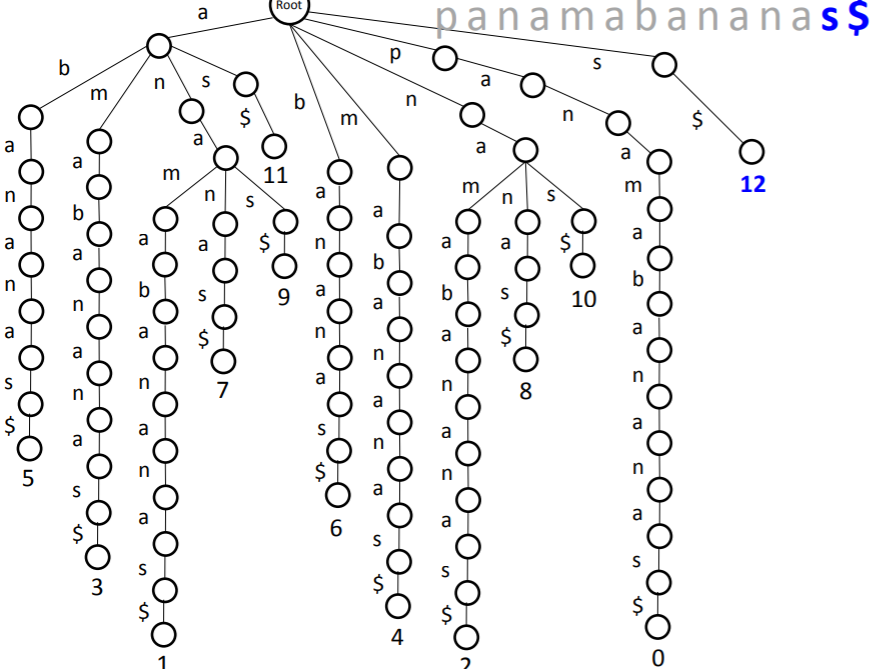


Ahora digamos que queremos ver si 'nana' est'a en el texto T, entonces tenemos que recorrer la palabra P = 'nana' en el arbol. Si la logramos recorrer, hemos encontrado  una instancia de nana en el texto. 

Hacemos un recorrido como el de esta imagen
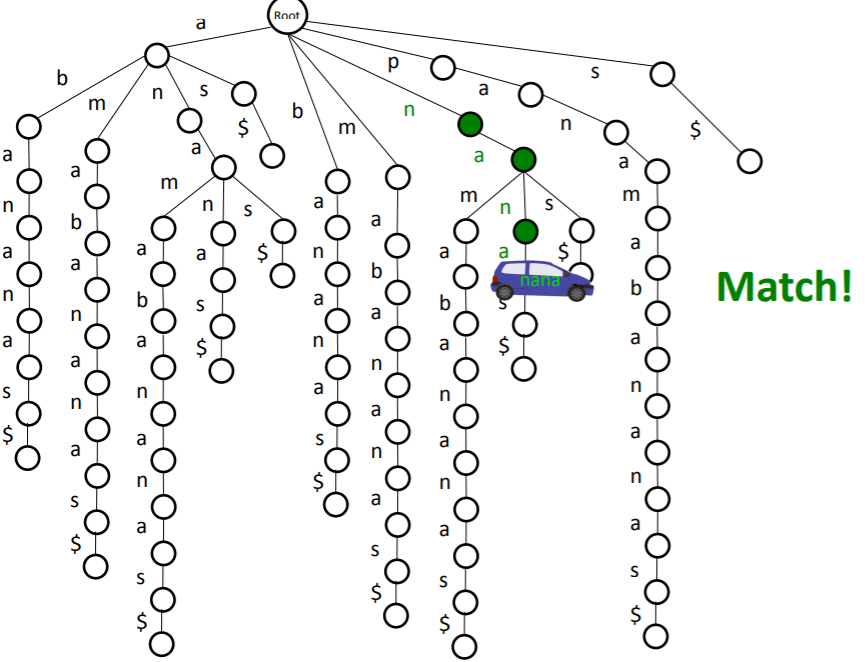

Y de hecho, el numero de veces que aparece nana va a ser igual al numero de subramas que salen despues de haber acabado el recorrido (en este ejemplo es 1). <br>
Si buscamos 'ana', al terminar nos quedan 3 subramas, por lo que ana aparece 3 veces (pues es el inicio de 3 sufijos). <br> 

El problema es que el suffix tree puede ser muy largo. 

###### From Suffix tries to Suffix Trees
Podemos reducir el suffix trie de forma que las ramas que ya no se separan las dejemos indicadas. Por ejemplo, el Trie anterior se transforma en:
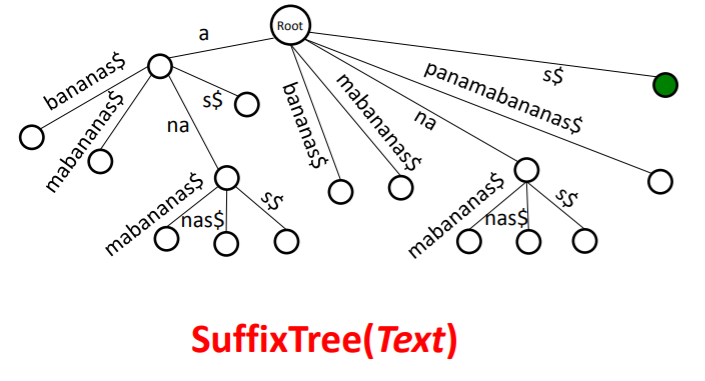



Parece no ayudar mucho, porque a final de cuentas, tenemos que guardar los labels de alguna forma. Sin embargo, recordamos que la palabra original es panamabananas. Y en vez de escribir el label en cada tree, escribimos la posicion en la que empieza cada texto y la cantidad de letras que abarca como sigue:

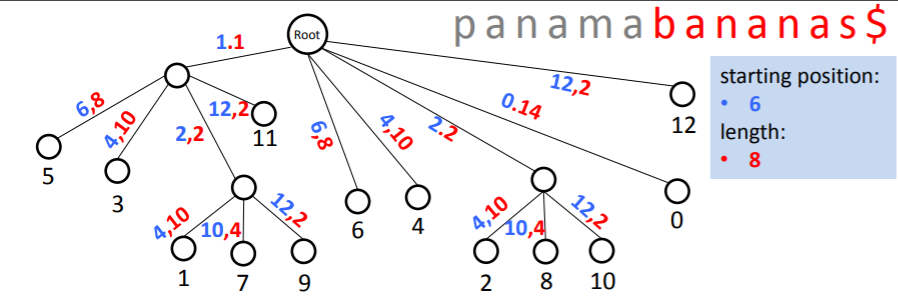

Agregar el $ al final de la palabra nos asegurar'a que cada sufijo termine siempre en una hoja, en vez de terminar en medio de una rama

### Construir el suffix Tree (Naive)
 Vamos recorriendo la palabra y as'i. Toma un tiempo de O(|T|^2) <br>
 
### Construir el suffix Tree (rapido):
Toma un tiempo lineal O(|T|), pero es un algoritmo demasiado complejo.

# 2. 
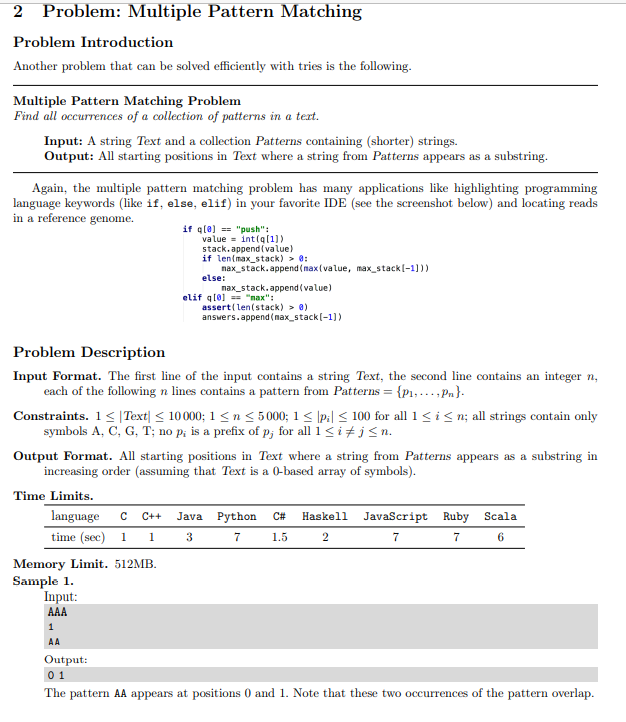

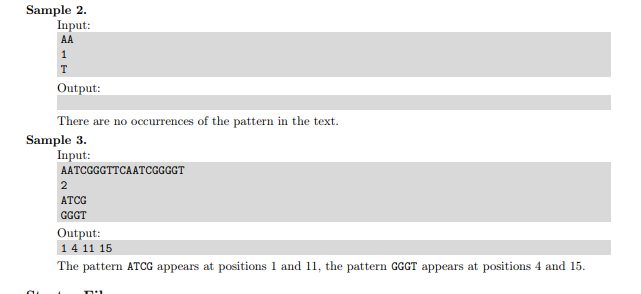!

In [3]:
#python3
#Input: un texto , un numero n de patrones y luego los n patrones.
#Buecar en el texto si algunos de los patrones aparece y marcar cuando
#Output, en un renglon, todas las aariciones de cualquier patron.

#Haremos el codigo tipo TrieMatching
''' Construimos un Trie de los patrones, y vamos viendo todos los sufijos
del texto. Si algun sufijo llega al fondo, hubo un match. ''' 
class nodos:
    def __init__(self, ind, valor):
        self.conex = []
        self.ind = ind
        self.valor = valor

def TrieConstruct(patterns):
    Trie = []
    Trie.append(nodos(0,0))
    for p in patterns:
        currnode = 0
        for i in range(len(p)):
            currsim = p[i]
            k=0
            if len(Trie[currnode].conex) > 0:
                for con in Trie[currnode].conex:
                    if Trie[con].valor == currsim:
                        currnode = con
                        k=1
                        break
                if k ==0:
                    nuevo_in = len(Trie)
                    Trie.append(nodos(nuevo_in, currsim))
                    Trie[currnode].conex.append(nuevo_in)
                    currnode = nuevo_in
            else:
                nuevo_in = len(Trie)
                Trie.append(nodos(nuevo_in, currsim))
                Trie[currnode].conex.append(nuevo_in)
                currnode = nuevo_in
    return(Trie)

def PrefixTrieMatch(Text, Trie, p):
    #Tomamos el primer elemento del texto (que es un sufijo del texto original)
    simb = Text[0]
    v = 0
    i = 0
    #While forever
    while i >= 0:
        
        k=0
        #Si estamos en una parte del arbol que tiene hijos (no hemos terminado una palabra)
        if len(Trie[v].conex) > 0:
            #Checamos si alguno de sus hijos coincide con la parte del texto en la que estamos
            for con in Trie[v].conex:
                #Si s'i, seguimos por esa rama y pasamos a la letra siguiente
                if Trie[con].valor == simb:
                    v = con
                    i = i+1
                    simb = Text[i]
                    k=1
                    break
            #Si despues de checar todas las ramas, ninguna es buena, no hay patrones que empiezen aqui
            if k == 0:
                return("None")
                break
        #Si estabamos en una hoja final, damos como resultado p (la posicion donde empezo la
        #Igualdad con el texto. 
        else:
            return(p)


def TrieMatching(Text, Trie):
    res=[]
    p=0
    #Mientras haya texto:
    while Text != [] :
        #Sacamos la respuesta de PRefixTrieMatch
        a = PrefixTrieMatch(Text,Trie,p)
        if a != "None":
            res.append(a)

        #Le quitamos la ultima letra al texo y p=p+1 marca que avanzamos un paso
        Text.pop(0)
        p = p+1
    return(res)
        


Text = [char for char in input()]
Text.append(0)
n= int(input())

patterns = []
for i in range(n):
    patterns.append(str(input()))
#Creamos el trie de patrones
Triep = TrieConstruct(patterns)


res = TrieMatching(Text, Triep)

print(*res)


AAA
1
AA
0 1
